# Zomato

In [34]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,6)
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [29]:
df=pd.read_csv('https://raw.githubusercontent.com/prm2711/python-recommender/master/zomato.csv')
df

,Restaurant ID,Restaurant Name,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,18420467,HotMess Bakes,"Bakery, Fast Food",750,Indian Rupees(Rs.),No,Yes,No,No,2,4.1,Green,Very Good,101
2194,18332869,London Street Kitchen,"North Indian, Mughlai, Chinese",600,Indian Rupees(Rs.),Yes,Yes,No,No,2,4.2,Green,Very Good,163
2195,18241878,Bablu Chic-Inn,"Mughlai, North Indian",750,Indian Rupees(Rs.),No,Yes,No,No,2,2.6,Orange,Average,25
2196,312959,Babu Jhatka,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,2.8,Orange,Average,5


In [30]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Cuisines', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [31]:
df.head()

,Restaurant ID,Restaurant Name,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [32]:
df.tail()

,Restaurant ID,Restaurant Name,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2193,18420467,HotMess Bakes,"Bakery, Fast Food",750,Indian Rupees(Rs.),No,Yes,No,No,2,4.1,Green,Very Good,101
2194,18332869,London Street Kitchen,"North Indian, Mughlai, Chinese",600,Indian Rupees(Rs.),Yes,Yes,No,No,2,4.2,Green,Very Good,163
2195,18241878,Bablu Chic-Inn,"Mughlai, North Indian",750,Indian Rupees(Rs.),No,Yes,No,No,2,2.6,Orange,Average,25
2196,312959,Babu Jhatka,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,2.8,Orange,Average,5
2197,978,Bal Gopal,"North Indian, Mughlai",500,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Orange,Average,49


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         2198 non-null   int64  
 1   Restaurant Name       2198 non-null   object 
 2   Cuisines              2198 non-null   object 
 3   Average Cost for two  2198 non-null   int64  
 4   Currency              2198 non-null   object 
 5   Has Table booking     2198 non-null   object 
 6   Has Online delivery   2198 non-null   object 
 7   Is delivering now     2198 non-null   object 
 8   Switch to order menu  2198 non-null   object 
 9   Price range           2198 non-null   int64  
 10  Aggregate rating      2198 non-null   float64
 11  Rating color          2198 non-null   object 
 12  Rating text           2198 non-null   object 
 13  Votes                 2198 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 240.5+ KB


In [35]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<Axes: >

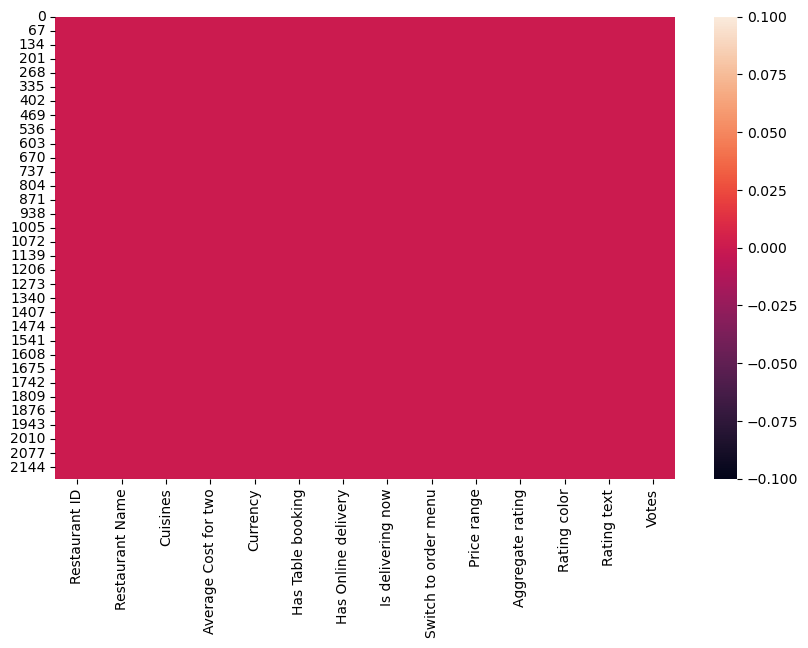

In [37]:
sns.heatmap(df.isnull())

In [38]:
df.describe()

,Restaurant ID,Average Cost for two,Price range,Aggregate rating,Votes
count,2.198000e+03,2198.000000,2198.000000,2198.000000,2198.000000
mean,1.061564e+07,534.541856,2.052775,3.121565,231.792084
std,8.414918e+06,583.948974,0.949302,1.377850,545.325759
min,1.570000e+02,0.000000,1.000000,0.000000,0.000000
25%,3.082892e+05,100.000000,1.000000,2.900000,13.000000
50%,1.728879e+07,400.000000,2.000000,3.500000,60.000000
75%,1.829147e+07,700.000000,3.000000,4.000000,231.000000
max,1.850065e+07,6000.000000,4.000000,4.900000,10934.000000


Restaurant ID              Axes(0.125,0.53;0.227941x0.35)
Average Cost for two    Axes(0.398529,0.53;0.227941x0.35)
Price range             Axes(0.672059,0.53;0.227941x0.35)
Aggregate rating           Axes(0.125,0.11;0.227941x0.35)
Votes                   Axes(0.398529,0.11;0.227941x0.35)
dtype: object

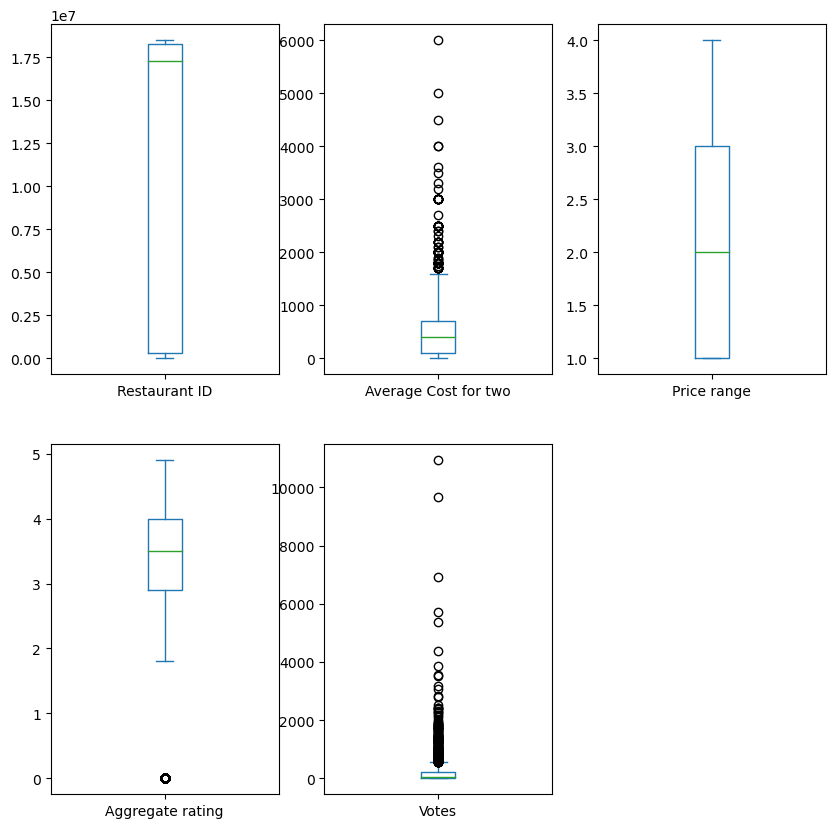

In [43]:
df.plot(kind='box',subplots=True,layout=(2,3),figsize=(10,10))

In [41]:
from scipy.stats import zscore

In [45]:
z_votes=np.abs(zscore(df.Votes))
z_votes

0       0.150784
1       0.658853
2       0.070080
3       0.244328
4       0.005121
          ...   
2193    0.239897
2194    0.126177
2195    0.379295
2196    0.415978
2197    0.335274
Name: Votes, Length: 2198, dtype: float64

In [46]:
z_votes.value_counts()

Votes
0.425149    171
0.423315     64
0.417813     39
0.421481     38
0.419647     37
           ... 
0.827598      1
0.612999      1
1.034861      1
1.434713      1
0.126177      1
Name: count, Length: 642, dtype: int64